welcome to the spatial arrangement test
DATA CONSENT INFORMATION:

Please read:

we wish to record your response data

to an anonymised public data repository.

Your data will be used for educational teaching purposes

practising data analysis and visualisation.

Please type yes in the box below if you consent to the upload.


>  yes


Thanks for your participation.
Please contact philip.lewis@ucl.ac.uk
If you have any questions or concerns
regarding the stored results.


Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:

- two letters based on the initials (first and last name) of a childhood friend

- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your friend was called Charlie Brown and film star was Tom Cruise

then your unique identifer would be CBTC




>  aaaa


User entered id: aaaa


Please enter your sex: male


question 1: which of the views (a-d) can not be made by rotating the cube arrangement shown?


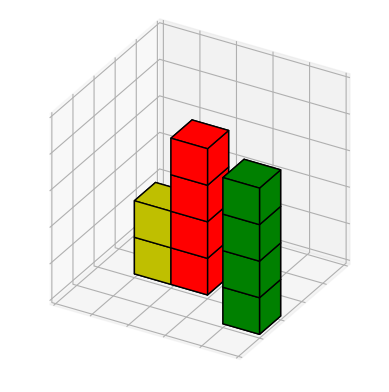

KeyboardInterrupt: Interrupted by user

In [6]:
from IPython.display import display, HTML, Image, clear_output, HTML
import random
import time
import requests
from bs4 import BeautifulSoup
import json



imgnum=['1','2','3','4','5','6','7','8']
imgangle=['xy','xz','yz','fake']

rule_dict = { 
    '1' : 'a',  
    '2' : 'b',  
    '3' : 'c',  
    '4' : 'd'} 

def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok



def questionsrunner():    
    totalans=8
    timestaken=[]
    
    for y in range (len(imgnum)):
        filelist=[]
        print(f"question {y+1}: which of the views (a-d) can not be made by rotating the cube arrangement shown?")
        start_time = time.time()
        display(Image(str(y+1) +'.png'))
        
        for i in range (len(imgangle)):
            filelist.append(str(y+1) + imgangle[i] +'.png')        
        random.shuffle(filelist)
        for b in range (len(filelist)):               
            if filelist[b]== str(y+1) +'fake'+'.png':
                correctans= rule_dict[str(b+1)]                            
        image_width = 200
        image_height = 200
        images_html = ''.join(f'<div style="display:inline-block; margin:10px;"><strong>{chr(97+i)}.</strong><br><img src="{img}" style="width:{image_width}px; height:{image_height}px;"/></div>' for i, img in enumerate(filelist))
        display(HTML(images_html))
        
        
        ans=input("answer:")        
        if ans==correctans or ans==correctans.upper():
            text="correct!"
            style= "color: green; font_size: 50px;"
            html_out = HTML (f"<span style='{style}'>{text}</span>")
            display(html_out)
            end_time = time.time()
            time_taken = end_time - start_time
        else:
            text="incorrect!"
            style= "color: red; font_size: 50px;"
            html_out = HTML (f"<span style='{style}'>{text}</span>")
            totalans=totalans-1
            display(html_out)
            time_taken= 'n/a'
        timestaken.append(str(time_taken))
        time.sleep(1.5)
        clear_output(wait=  False)
        if y+1 <= (len(imgnum))-1:
            text="next question"
            style= "color: black; font_size: 100px;"
            html_out = HTML (f"<span style='{style}'>{text}</span>")
            display(html_out)
            time.sleep(2)
            clear_output(wait=  False)              
        else:
            print ("thank you for participating!")
            print (f"your score was {totalans} out of 8!")
    timestaken.append(str(totalans))
    return timestaken



print ("welcome to the spatial arrangement test")
time.sleep(2)

data_consent_info = """DATA CONSENT INFORMATION:

Please read:

we wish to record your response data

to an anonymised public data repository.

Your data will be used for educational teaching purposes

practising data analysis and visualisation.

Please type yes in the box below if you consent to the upload."""

print(data_consent_info)

result = input("> ")

if result == "yes":

    print("Thanks for your participation.")

    print("Please contact philip.lewis@ucl.ac.uk")

    print("If you have any questions or concerns")

    print("regarding the stored results.")

else:

    # end code execution by raising an exception

    raise(Exception("User did not consent to continue test."))


time.sleep(2)

id_instructions = """

Enter your anonymised ID

To generate an anonymous 4-letter unique user identifier please enter:

- two letters based on the initials (first and last name) of a childhood friend

- two letters based on the initials (first and last name) of a favourite actor / actress

e.g. if your friend was called Charlie Brown and film star was Tom Cruise

then your unique identifer would be CBTC

"""

print(id_instructions)

user_id = input("> ")

print("User entered id:", user_id)

time.sleep(2)

sex = input("Please enter your sex:")

data=questionsrunner()

data_dict = {

'name': user_id,

'sex': sex,
    
'time take to complete question 1:': data[0],

'time take to complete question 2:':  data[1],

'time take to complete question 3:' : data[2],

'time take to complete question 4:' : data[3],

'time take to complete question 5:' : data[4],

'time take to complete question 6:' : data[5],

'time take to complete question 7:' : data[6],

'time take to complete question 8:' : data[7],

'total score:' : data[-1]

}


form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSc7Ox0fp4StM4Gipicn-2Ow2h2OT1DIGAfmhxPQgUrmMynkaw/viewform?usp=sf_link'


send_to_google_form(data_dict,form_url)
